In [199]:
# Import necessary packages
from urllib.parse import urlencode
from json import dumps
from requests import get

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
%matplotlib inline

In [200]:
# Set up constants
url = "https://api.coronavirus.data.gov.uk/v1/data"

structureAll = {
  "areaType": "areaType",
  "areaName": "areaName",
  "areaCode": "areaCode",
  "date": "date",
  "newCasesPub": "newCasesByPublishDate",
  "cumCasesPub": "cumCasesByPublishDate",
  "cumCasesPubRate": "cumCasesByPublishDateRate",
  "newCasesAct": "newCasesBySpecimenDate",
  "cumCasesAct": "cumCasesBySpecimenDate",
  "cumCasesActRate": "cumCasesBySpecimenDateRate",
  "maleCases": "maleCases",
  "femaleCases": "femaleCases",
  "newPillarOneTestsByPublishDate": "newPillarOneTestsByPublishDate",
  "cumPillarOneTestsByPublishDate": "cumPillarOneTestsByPublishDate",
  "newPillarTwoTestsByPublishDate": "newPillarTwoTestsByPublishDate",
  "cumPillarTwoTestsByPublishDate": "cumPillarTwoTestsByPublishDate",
  "newPillarThreeTestsByPublishDate": "newPillarThreeTestsByPublishDate",
  "cumPillarThreeTestsByPublishDate": "cumPillarThreeTestsByPublishDate",
  "newPillarFourTestsByPublishDate": "newPillarFourTestsByPublishDate",
  "cumPillarFourTestsByPublishDate": "cumPillarFourTestsByPublishDate",
  "newAdmissions": "newAdmissions",
  "cumAdmissions": "cumAdmissions",
  "cumAdmissionsByAge": "cumAdmissionsByAge",
  "cumTests": "cumTestsByPublishDate",
  "newTests": "newTestsByPublishDate",
  "covidOccupiedMVBeds": "covidOccupiedMVBeds",
  "hospitalCases": "hospitalCases",
  "plannedCapacityByPublishDate": "plannedCapacityByPublishDate",
  "newDeathsPub": "newDeaths28DaysByPublishDate",
  "cumDeathsPub": "cumDeaths28DaysByPublishDate",
  "cumDeathsPubRate": "cumDeaths28DaysByPublishDateRate",
  "newDeathsAct": "newDeaths28DaysByDeathDate",
  "cumDeathsAct": "cumDeaths28DaysByDeathDate",
  "cumDeathsActRate": "cumDeaths28DaysByDeathDateRate",
  }

structureDeathsCases = {
  "areaType": "areaType",
  "areaName": "areaName",
  "areaCode": "areaCode",
  "date": "date",
  "newCasesPub": "newCasesByPublishDate",
  "newDeathsPub": "newDeaths28DaysByPublishDate",
  }

structureNhs = {
  "areaType": "areaType",
  "areaName": "areaName",
  "areaCode": "areaCode",
  "date": "date",
  "hospitalCases": "hospitalCases",
  "newAdmissions": "newAdmissions",
  "covidOccupiedMVBeds": "covidOccupiedMVBeds",
  }

In [201]:
# Get the data from the API endpoint
def get_data(url, filters, structure):
  api_params = {
    "filters": str.join(";", filters),
    "structure": dumps(structure, separators=(",", ":")),
  }
  encoded_params = urlencode(api_params)
  endpoint = url + "?" + encoded_params
  response = get(endpoint, timeout=10000)
    
  if response.status_code >= 400:
    raise RuntimeError('Request failed: ' + response.text )
        
  return response.json()

In [202]:
# Get Overall UK level Data
filters = [
  "areaType=overview",
]

data_in = get_data(url, filters, structureDeathsCases) 
uk_df = pd.DataFrame(data_in['data'])
uk_df = uk_df.sort_values(by=['date'])

# Get England level Data
filters = [
  "areaType=nation",
  "areaName=England",
]

data_in = get_data(url, filters, structureDeathsCases) 
eng_df = pd.DataFrame(data_in['data'])
eng_df = eng_df.sort_values(by=['date'])

# Get Scotland level Data
filters = [
  "areaType=nation",
  "areaName=Scotland",
]

data_in = get_data(url, filters, structureDeathsCases) 
scot_df = pd.DataFrame(data_in['data'])
scot_df = scot_df.sort_values(by=['date'])

# Get Wales level Data
filters = [
  "areaType=nation",
  "areaName=Wales",
]

data_in = get_data(url, filters, structureDeathsCases) 
wal_df = pd.DataFrame(data_in['data'])
wal_df = wal_df.sort_values(by=['date'])

# Get Ireland level Data
filters = [
  "areaType=nation",
  "areaName=Northern Ireland",
]

data_in = get_data(url, filters, structureDeathsCases) 
ire_df = pd.DataFrame(data_in['data'])
ire_df = ire_df.sort_values(by=['date'])


In [203]:
# Get NHS Region - East of England
filters = [
  "areaType=nhsRegion",
  "areaName=East of England",
]

data_in = get_data(url, filters, structureNhs) 
East_Of_England_df = pd.DataFrame(data_in['data'])
East_Of_England_df = East_Of_England_df.sort_values(by=['date'])

# Get NHS Region - London
filters = [
  "areaType=nhsRegion",
  "areaName=London",
]

data_in = get_data(url, filters, structureNhs) 
London_df = pd.DataFrame(data_in['data'])
London_df = London_df.sort_values(by=['date'])

# Get NHS Region - Midlands
filters = [
  "areaType=nhsRegion",
  "areaName=Midlands",
]

data_in = get_data(url, filters, structureNhs) 
Midlands_df = pd.DataFrame(data_in['data'])
Midlands_df = Midlands_df.sort_values(by=['date'])

# Get NHS Region - North East and Yorkshire
filters = [
  "areaType=nhsRegion",
  "areaName=North East and Yorkshire",
]

data_in = get_data(url, filters, structureNhs) 
North_East_and_Yorkshire_df = pd.DataFrame(data_in['data'])
North_East_and_Yorkshire_df = North_East_and_Yorkshire_df.sort_values(by=['date'])

# Get NHS Region - North West
filters = [
  "areaType=nhsRegion",
  "areaName=North West",
]

data_in = get_data(url, filters, structureNhs) 
North_West_df = pd.DataFrame(data_in['data'])
North_West_df = North_West_df.sort_values(by=['date'])

# Get NHS Region - South East
filters = [
  "areaType=nhsRegion",
  "areaName=South East",
]

data_in = get_data(url, filters, structureNhs) 
South_East_df = pd.DataFrame(data_in['data'])
South_East_df = South_East_df.sort_values(by=['date'])

# Get NHS Region - South West
filters = [
  "areaType=nhsRegion",
  "areaName=South West",
]

data_in = get_data(url, filters, structureNhs) 
South_West_df = pd.DataFrame(data_in['data'])
South_West_df = South_West_df.sort_values(by=['date'])

# Get NHS Region - Scotland
filters = [
  "areaType=nation",
  "areaName=Scotland",
]

data_in = get_data(url, filters, structureNhs) 
Scotland_df = pd.DataFrame(data_in['data'])
Scotland_df = Scotland_df.sort_values(by=['date'])

# Get NHS Region - Wales
filters = [
  "areaType=nation",
  "areaName=Wales",
]

data_in = get_data(url, filters, structureNhs) 
Wales_df = pd.DataFrame(data_in['data'])
Wales_df = Wales_df.sort_values(by=['date'])

# Get NHS Region - Northern Ireland
filters = [
  "areaType=nation",
  "areaName=Northern Ireland",
]

data_in = get_data(url, filters, structureNhs) 
Northern_Ireland_df = pd.DataFrame(data_in['data'])
Northern_Ireland_df = Northern_Ireland_df.sort_values(by=['date'])


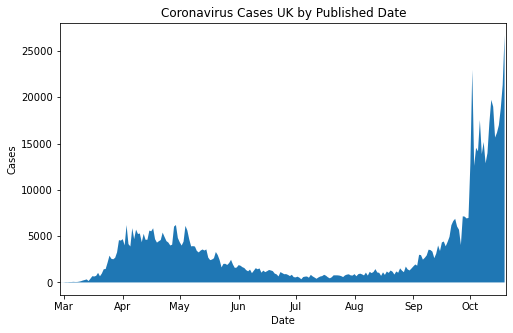

In [204]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
ax.fill_between(uk_df.date, 0, uk_df.newCasesPub,label='cases')
ax.set(title="Coronavirus Cases UK by Published Date")
ax.set(xlabel="Date")
ax.set(ylabel="Cases")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xlim('2020-03-01', '2020-12-31')
plt.show()

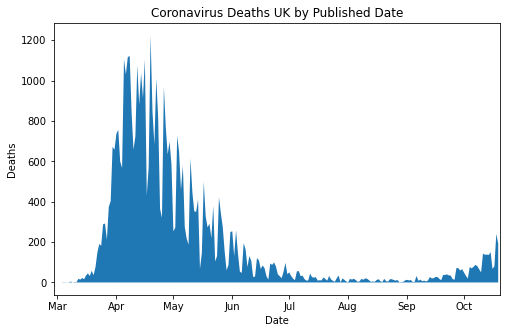

In [205]:
# UK Deaths Published
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
ax.fill_between(uk_df.date, 0, uk_df.newDeathsPub)
ax.set(title="Coronavirus Deaths UK by Published Date")
ax.set(xlabel="Date")
ax.set(ylabel="Deaths")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xlim('2020-03-01', '2020-12-31')
plt.show()

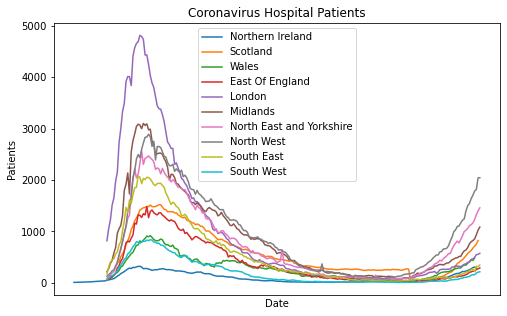

In [206]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.plot(Northern_Ireland_df.date, Northern_Ireland_df.hospitalCases,label='Northern Ireland')
ax.plot(Scotland_df.date, Scotland_df.hospitalCases,label='Scotland')
ax.plot(Wales_df.date, Wales_df.hospitalCases,label='Wales')
ax.plot(East_Of_England_df.date, East_Of_England_df.hospitalCases,label='East Of England')
ax.plot(London_df.date, London_df.hospitalCases,label='London')
ax.plot(Midlands_df.date, Midlands_df.hospitalCases,label='Midlands')
ax.plot(North_East_and_Yorkshire_df.date, North_East_and_Yorkshire_df.hospitalCases,label='North East and Yorkshire')
ax.plot(North_West_df.date, North_West_df.hospitalCases,label='North West')
ax.plot(South_East_df.date, South_East_df.hospitalCases,label='South East')
ax.plot(South_West_df.date, South_West_df.hospitalCases,label='South West')

ax.set_title("Coronavirus Hospital Patients")
ax.set_xlabel("Date")
ax.set_ylabel("Patients")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.legend()
#plt.xlim('2020-03-19', '2020-12-31')
plt.show()

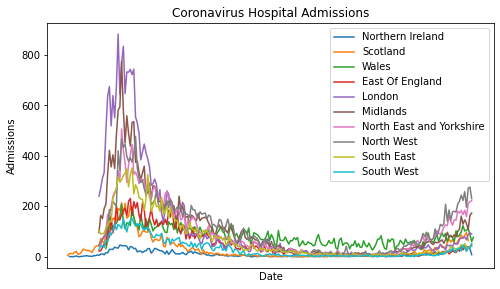

In [207]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.plot(Northern_Ireland_df.date, Northern_Ireland_df.newAdmissions,label='Northern Ireland')
ax.plot(Scotland_df.date, Scotland_df.newAdmissions,label='Scotland')
ax.plot(Wales_df.date, Wales_df.newAdmissions,label='Wales')
ax.plot(East_Of_England_df.date, East_Of_England_df.newAdmissions,label='East Of England')
ax.plot(London_df.date, London_df.newAdmissions,label='London')
ax.plot(Midlands_df.date, Midlands_df.newAdmissions,label='Midlands')
ax.plot(North_East_and_Yorkshire_df.date, North_East_and_Yorkshire_df.newAdmissions,label='North East and Yorkshire')
ax.plot(North_West_df.date, North_West_df.newAdmissions,label='North West')
ax.plot(South_East_df.date, South_East_df.newAdmissions,label='South East')
ax.plot(South_West_df.date, South_West_df.newAdmissions,label='South West')

ax.set_title("Coronavirus Hospital Admissions")
ax.set_xlabel("Date")
ax.set_ylabel("Admissions")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.legend()
#plt.xlim("2020-03-01", "2020-12-31")
plt.gcf().autofmt_xdate()
plt.show()

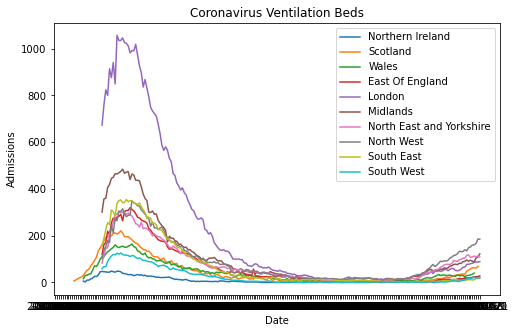

In [211]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.plot(Northern_Ireland_df.date, Northern_Ireland_df.covidOccupiedMVBeds,label='Northern Ireland')
ax.plot(Scotland_df.date, Scotland_df.covidOccupiedMVBeds,label='Scotland')
ax.plot(Wales_df.date, Wales_df.covidOccupiedMVBeds,label='Wales')
ax.plot(East_Of_England_df.date, East_Of_England_df.covidOccupiedMVBeds,label='East Of England')
ax.plot(London_df.date, London_df.covidOccupiedMVBeds,label='London')
ax.plot(Midlands_df.date, Midlands_df.covidOccupiedMVBeds,label='Midlands')
ax.plot(North_East_and_Yorkshire_df.date, North_East_and_Yorkshire_df.covidOccupiedMVBeds,label='North East and Yorkshire')
ax.plot(North_West_df.date, North_West_df.covidOccupiedMVBeds,label='North West')
ax.plot(South_East_df.date, South_East_df.covidOccupiedMVBeds,label='South East')
ax.plot(South_West_df.date, South_West_df.covidOccupiedMVBeds,label='South West')

ax.set_title("Coronavirus Ventilation Beds")
ax.set_xlabel("Date")
ax.set_ylabel("Admissions")
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.legend()
#plt.xlim('2020-03-23', '2020-12-31')
plt.show()